In [28]:
import perceval as pcvl
from perceval.polyquantique.algorithm.BasicStateJitter import BasicStateJitter,Source
from perceval.polyquantique.algorithm.ProcessorJitter import ProcessorJitter
from perceval.polyquantique.algorithm.DistributionEnvelope import Schmidt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import itertools

### Create base vector

In [29]:
state = "|0,0,1,0>"
of = np.linspace(-3*0.5,3*0.5,2)
of0 = np.array([0,0,0,0])
bv = BasicStateJitter(state,offset=of0)

### Print vector input and new base

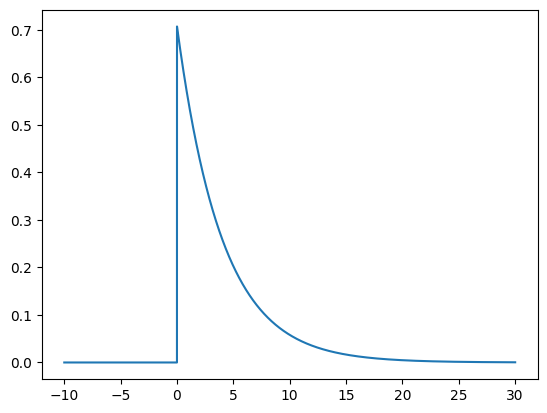

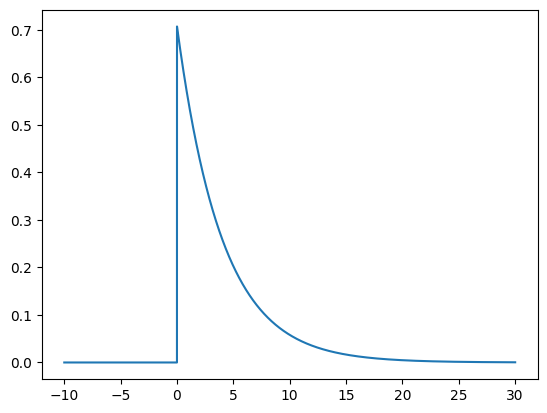

In [30]:
bv.print_vect()

### Coefficient matrix

In [31]:
print(bv.coef_matrix)

[[1.00024982]]


### States used and coefficient associated

In [32]:
print(bv.coef_list )
print(bv.bs_vector)

[1.0004997]
[[(0, 0, 1, 0)]]


### Create HOM circuit

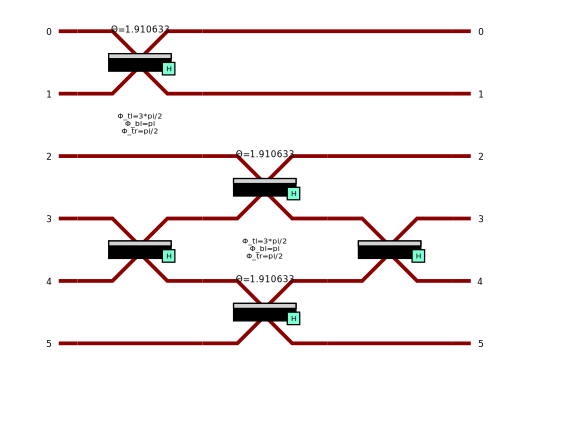

In [33]:
cnot = pcvl.Circuit(6, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
pcvl.pdisplay(cnot)

### Use processor on HOM

In [34]:
processor = pcvl.Processor("Naive", cnot)
processor.add_herald(0, 0)
processor.add_herald(5, 0)
pcvl.pdisplay(processor, recursive = True)
Pj = ProcessorJitter(bv,processor)
Pj.print_output()

,"|0,0,0,0>","|0,0,0,1>","|1,0,0,0>","|0,0,1,0>","|0,1,0,0>"
"|0,0,0,0>",0,0,0,0,0
"|0,0,1,0>",0,0,0,1/2,1/2


|0,0,0,1> [0.]
|1,0,0,0> [0.]
|0,0,1,0> [0.50024985]
|0,1,0,0> [0.50024985]
Probabilite totale = 1.0004997023651607


In [35]:
HOM = 1-2*Pj.output_prob[4][0]
print('HOM = ', HOM)

HOM =  -0.0004997023651607257


In [36]:
Pj.output_prob

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.50024985],
       [0.50024985]])